# Introduction

The Play Store hosts a wide range of applications, and the data associated with these apps offers significant potential for analysis. Developers and businesses can leverage this data to understand market trends, optimize their apps, and maximize user engagement.

**In this project**, we will perform a data cleaning and preprocessing task on the Play Store apps dataset, addressing missing values, outliers, and other issues while extracting valuable insights.


# Data description
| Column Name       | Description  |
|------------------|-------------|
| **Application name** | Name of the application |
| **Category** | Category the app belongs to |
| **Rating** | Overall user rating of the app (as when scraped) |
| **Reviews** | Number of user reviews for the app (as when scraped) |
| **Size** | Size of the app (as when scraped) |
| **Installs** | Number of user downloads/installs for the app (as when scraped) |
| **Type** | Whether the app is paid or free |
| **Price** | Price of the app (as when scraped) |
| **Content Rating** | Age group the app is targeted at (e.g., Children / Mature 21+ / Adult) |
| **Genres** | An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to multiple genres. |


In [553]:
import pandas as pd
import numpy as np

In [554]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [556]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [557]:
# check duplicates
n_duplicated = df.duplicated(subset=['App']).sum()
print("There are {}/{} duplicated records.".format(n_duplicated, df.shape[0]))
df = df.drop_duplicates()
df = df.drop_duplicates(subset='App', keep="first")

There are 1181/10841 duplicated records.


### ✅ Fix Rating
- Ensure that all ratings are within the valid range (0 to 5).
- Replace invalid values with appropriate measures (mean, median, or mode).

In [558]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [559]:
df['Rating'] = df['Rating'].apply(lambda x: 5 if x > 5 else x)

print(df['Rating'].unique())


[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]


In [560]:
df.describe()

,Rating
count,9660.000000
mean,4.192526
std,0.496439
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


### ✅ Fix Size
- Convert size values into numerical format (e.g., "12M" → 12,000,000 bytes).
- Handle missing or inconsistent size entries.

In [561]:
def fix_size(value):
    if pd.isnull(value) or value == 'Varies with device':
        return np.nan
    if isinstance(value, str):  
        value = value.replace(',', '').replace('+', '') 
        
        if 'M' in value:
            return float(value.replace('M', ''))
        elif 'k' in value:
            return float(value.replace('k', '')) * 0.001
        else:
            return float(value) 
    else:
        return value  


In [562]:
df['Size'] = df['Size'].apply(fix_size)
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   float64
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [564]:
df.describe()

,Rating,Size
count,9660.000000,9660.000000
mean,4.192526,20.511453
std,0.496439,22.698186
min,1.000000,0.008500
25%,4.000000,5.300000
50%,4.300000,16.000000
75%,4.500000,25.000000
max,5.000000,1000.000000


In [565]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Size'] = scaler.fit_transform(df[['Size']])


In [566]:
df.describe()

,Rating,Size
count,9660.000000,9660.000000
mean,4.192526,0.020503
std,0.496439,0.022698
min,1.000000,0.000000
25%,4.000000,0.005292
50%,4.300000,0.015992
75%,4.500000,0.024992
max,5.000000,1.000000


### ✅ Fix Price
- Convert price values to a uniform numerical currency format.
- Ensure that free apps are represented as zero.

In [567]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [568]:
df['Price'].value_counts()

Price
0           8903
$0.99        145
$2.99        124
$1.99         73
$4.99         70
            ... 
$394.99        1
$1.26          1
Everyone       1
$1.20          1
$1.04          1
Name: count, Length: 93, dtype: int64

In [569]:
def convert_price(value):
    if pd.isnull(value):
        return np.nan
    if value.startswith('$'):
        return float(value.replace('$', '').replace(',', ''))
    if value=='0':
        return value


In [570]:
df['Price'] = df['Price'].apply(convert_price)
df["Price"] = pd.to_numeric(df["Price"], errors='coerce')


In [571]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [572]:
df['Price'] = df['Price'].fillna(df['Price'].mean())


In [573]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          9660 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   float64
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [574]:
df.describe()

,Rating,Size,Price
count,9660.000000,9660.000000,9660.000000
mean,4.192526,0.020503,1.099299
std,0.496439,0.022698,16.851280
min,1.000000,0.000000,0.000000
25%,4.000000,0.005292,0.000000
50%,4.300000,0.015992,0.000000
75%,4.500000,0.024992,0.000000
max,5.000000,1.000000,400.000000


In [575]:
df['Price'].value_counts()

Price
0.000000      8903
0.990000       145
2.990000       124
1.990000        73
4.990000        70
              ... 
394.990000       1
1.260000         1
1.099299         1
1.200000         1
1.040000         1
Name: count, Length: 93, dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

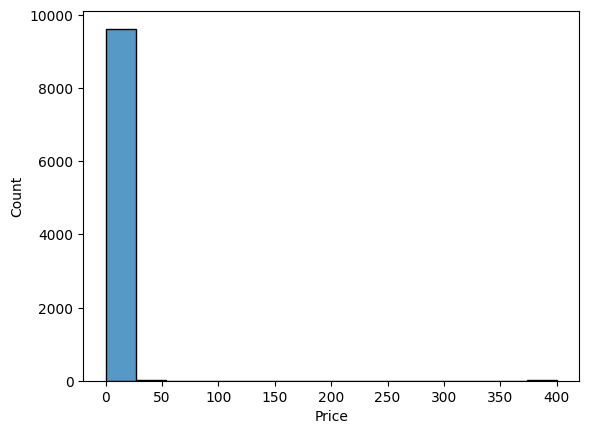

In [576]:
import seaborn as sns
sns.histplot(df['Price'])

In [577]:
mismatch = df[(df['Type'] == 'Free') & (df['Price'] != 0)]

if mismatch.empty:
   print("✅ All free apps have a price of 0.")
else:
   print("⚠️ Mismatched cases:")
   print(mismatch[['Type', 'Price']])

✅ All free apps have a price of 0.


In [578]:
paid_zero_df = df[(df['Type'] == 'Paid') & (df['Price'] == 0)]
print(paid_zero_df)
print(f" Number of rows : {len(paid_zero_df)}")


Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []
 Number of rows : 0


In [579]:
df.describe()

,Rating,Size,Price
count,9660.000000,9660.000000,9660.000000
mean,4.192526,0.020503,1.099299
std,0.496439,0.022698,16.851280
min,1.000000,0.000000,0.000000
25%,4.000000,0.005292,0.000000
50%,4.300000,0.015992,0.000000
75%,4.500000,0.024992,0.000000
max,5.000000,1.000000,400.000000


### ✅ Fix Category
- Standardize category names (remove typos and inconsistencies).
- Handle missing categories by assigning the most common category if appropriate.

In [580]:
df['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [581]:
df = df[~df['Category'].str.match(r'^\d+(\.\d+)?$', na=False)]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(3), object(10)
memory usage: 1.0+ MB


In [582]:
df['Category'] = df['Category'].str.replace('_', ' ').str.title()

df['Category'] = df['Category'].str.strip()

unique_categories = df['Category'].unique()
print(unique_categories)

['Art And Design' 'Auto And Vehicles' 'Beauty' 'Books And Reference'
 'Business' 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment'
 'Events' 'Finance' 'Food And Drink' 'Health And Fitness' 'House And Home'
 'Libraries And Demo' 'Lifestyle' 'Game' 'Family' 'Medical' 'Social'
 'Shopping' 'Photography' 'Sports' 'Travel And Local' 'Tools'
 'Personalization' 'Productivity' 'Parenting' 'Weather' 'Video Players'
 'News And Magazines' 'Maps And Navigation']


### ✅ Fix Android Version
- Ensure Android version numbers follow a valid format (e.g., "4.1 and up").
- Handle missing values by assigning the minimum version that can support the app.

In [583]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [584]:
df['Android Ver'] = df['Android Ver'].astype(str).str.extract(r'(\d+\.\d{1})')[0]
df['Android Ver'] = pd.to_numeric(df['Android Ver'], errors='coerce')

In [585]:
df[df.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,Art And Design,3.2,55,0.002692,"5,000+",Free,0.0,Everyone,Art & Design,"June 6, 2018",NaN,4.2
42,Textgram - write on photos,Art And Design,4.4,295221,0.020503,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,NaN
52,Used Cars and Trucks for Sale,Auto And Vehicles,4.6,17057,0.020503,"1,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,NaN
67,Ulysse Speedometer,Auto And Vehicles,4.3,40211,0.020503,"5,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,NaN
68,REPUVE,Auto And Vehicles,3.9,356,0.020503,"100,000+",Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,Weather,4.4,3471,0.020503,"100,000+",Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,NaN
10765,Chat For Strangers - Video Chat,Social,3.4,622,0.020503,"100,000+",Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,NaN
10826,Frim: get new friends on local chat rooms,Social,4.0,88486,0.020503,"5,000,000+",Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,NaN
10839,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,0.020503,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,NaN


In [586]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].min())

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9659 non-null   float64
dtypes: float64(4), object(9)
memory usage: 1.0+ MB


### ✅ Fix Current Version

In [588]:
df['Current Ver'] = pd.to_numeric(df['Current Ver'], errors='coerce')

df['Current Ver'] = df['Current Ver'].round(2)

max_reasonable_version = 10.0  
df['Current Ver'] = np.where(df['Current Ver'] > max_reasonable_version, max_reasonable_version, df['Current Ver'])

print(df['Current Ver'].unique())

[  nan  1.1   1.    2.8   3.8   3.1   4.    1.5   1.03  6.    1.2   2.2
  1.6   2.1   1.3   1.46 10.    3.    2.49  1.7   1.37  2.9   1.79  8.31
  1.4   2.17  1.9   5.4   8.    1.15  2.    1.91  3.12  1.28  3.05  3.3
  4.9   1.08  1.01  5.2   6.1   7.73  4.98  7.21  3.47  1.29  2.3   1.64
  2.45  1.23  4.3   1.55  1.17  2.4   2.5   8.2   4.2   3.52  3.7   4.81
  4.1   2.24  2.48  2.09  5.    1.16  1.02  7.3   8.06  8.1   4.43  8.4
  1.57  1.75  1.11  1.14  8.18  4.63  2.13  5.1   2.12  7.12  4.26  5.23
  2.6   3.4   3.48  5.3   4.4   6.7   7.    3.22  1.92  7.4   3.6   1.04
  1.8   5.28  9.    5.8   2.15  4.35  5.66  3.5   5.06  1.24  1.93  1.76
  6.2   3.15  1.49  2.7   1.73  2.18  7.32  1.18  1.22  1.47  3.49  1.19
  7.5   3.46  2.29  3.19  4.36  5.11  6.6   0.1   1.12  5.51  2.69  2.16
  4.89  7.36  3.9   6.21  4.47  1.43  1.32  4.7   3.2   4.5   4.21  6.71
  6.5   5.5   5.9   7.1   5.48  4.6   5.36  1.51  1.33  1.13  2.85  2.41
  6.07  2.32  8.9   1.78  2.71  5.17  8.3   9.1   5.38

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     3447 non-null   float64
 12  Android Ver     9659 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [590]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   float64
 12  Android Ver     9659 non-null   float64
dtypes: float64(5), object(8)
memory usage: 1.0+ MB


In [592]:
df.describe()

,Rating,Size,Price,Current Ver,Android Ver
count,9659.000000,9659.000000,9659.000000,9659.000000,9659.000000
mean,4.192442,0.020402,1.099299,1.527329,3.549632
std,0.496397,0.020394,16.852152,1.585977,1.181630
min,1.000000,0.000000,0.000000,0.100000,1.000000
25%,4.000000,0.005292,0.000000,1.000000,2.300000
50%,4.300000,0.015992,0.000000,1.000000,4.000000
75%,4.500000,0.024992,0.000000,1.100000,4.100000
max,5.000000,0.099992,400.000000,10.000000,8.000000


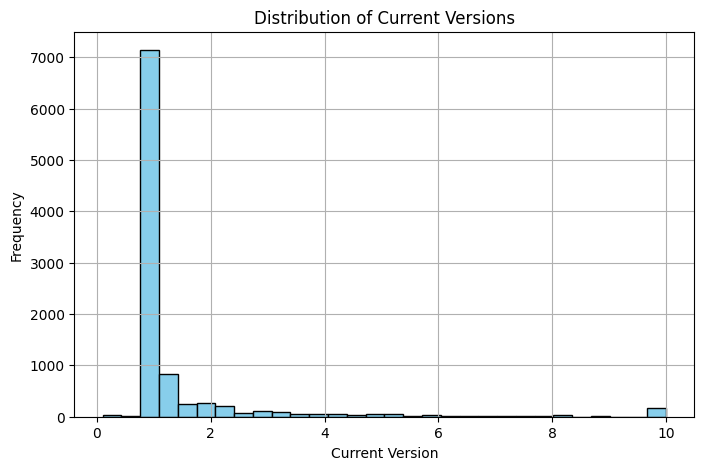

In [593]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df['Current Ver'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Current Versions')
plt.xlabel('Current Version')
plt.ylabel('Frequency')
plt.show() 

### ✅ Fix Installs

In [594]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [595]:
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
df.Installs.value_counts()

Installs
1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: count, dtype: int64

In [596]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

### ✅ Fix Reviews 

In [597]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(5330,), dtype=object)

In [598]:
df['Reviews'].value_counts()

Reviews
0         593
1         272
2         213
3         170
4         137
         ... 
885         1
88486       1
603         1
1195        1
398307      1
Name: count, Length: 5330, dtype: int64

In [599]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') 
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   float64
 12  Android Ver     9659 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.0+ MB


### ✅ Fix Type 

In [601]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [602]:
df['Type'] = df['Type'].fillna('Free')

### ✅ Outlier Detection and Handling

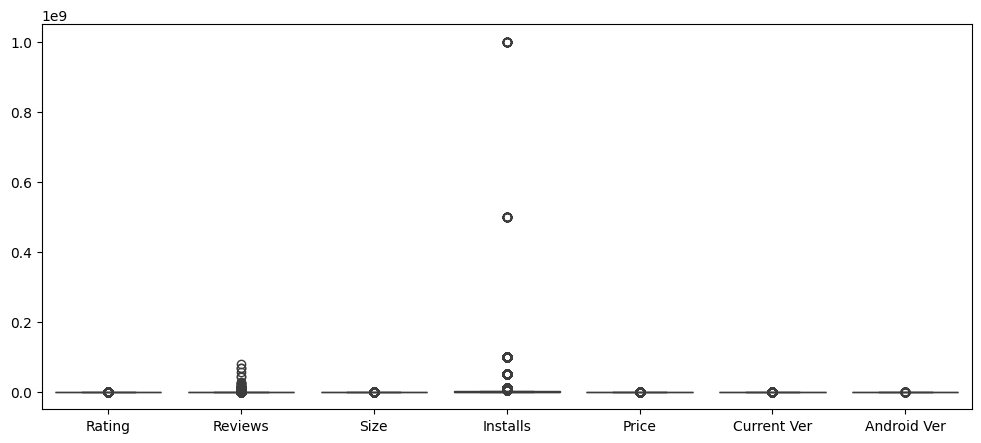

In [603]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5)) 
sns.boxplot(df)
plt.show()


In [604]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Reviews'] < lower_bound) | (df['Reviews'] > upper_bound)]

print(outliers)

df_cleaned = df[(df['Reviews'] >= lower_bound) & (df['Reviews'] <= upper_bound)]

df['Reviews'] = df['Reviews'].apply(lambda x: Q3 if x > upper_bound else x)

                                                     App        Category  \
2      U Launcher Lite – FREE Live Cool Themes, Hide ...  Art And Design   
3                                  Sketch - Draw & Paint  Art And Design   
18                         FlipaClip - Cartoon animation  Art And Design   
19                                          ibis Paint X  Art And Design   
42                            Textgram - write on photos  Art And Design   
...                                                  ...             ...   
10781                               Modern Strike Online            Game   
10784                                         Big Hunter            Game   
10809              Castle Clash: RPG War and Strategy FR          Family   
10826          Frim: get new friends on local chat rooms          Social   
10840      iHoroscope - 2018 Daily Horoscope & Astrology       Lifestyle   

       Rating  Reviews      Size  Installs  Type  Price Content Rating  \
2         4.7

In [605]:
Q1 = df['Installs'].quantile(0.25)
Q3 = df['Installs'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

df['Installs'] = np.where(df['Installs'] > upper_limit, upper_limit, df['Installs'])


In [606]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Current Ver,Android Ver
count,9659.000000,9659.000000,9659.000000,9.659000e+03,9659.000000,9659.000000,9659.000000
mean,4.192442,11073.073507,0.020402,6.998624e+05,1.099299,1.527329,3.549632
std,0.496397,15782.951850,0.020394,9.745296e+05,16.852152,1.585977,1.181630
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.100000,1.000000
25%,4.000000,25.000000,0.005292,1.000000e+03,0.000000,1.000000,2.300000
50%,4.300000,967.000000,0.015992,1.000000e+05,0.000000,1.000000,4.000000
75%,4.500000,29394.000000,0.024992,1.000000e+06,0.000000,1.100000,4.100000
max,5.000000,73404.000000,0.099992,2.498500e+06,400.000000,10.000000,8.000000


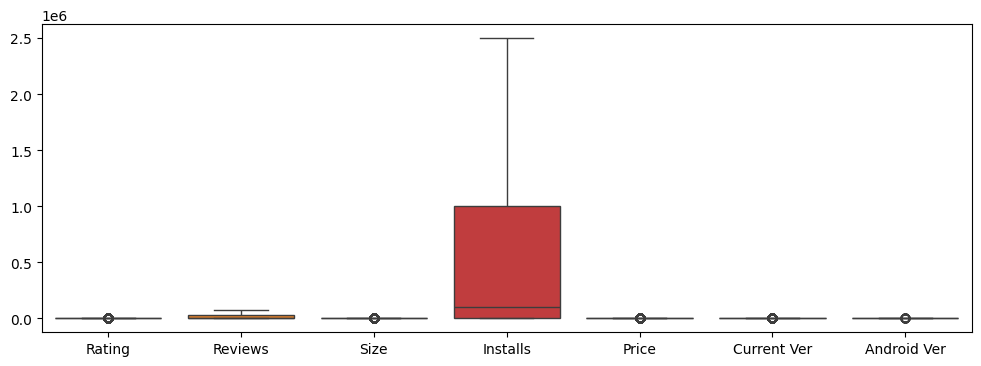

In [607]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4)) 
sns.boxplot(df)
plt.show()


## Analytical Questions:

In [608]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7374,CI MOBI,Family,4.3,108.0,0.041992,5000.0,Free,0.0,Everyone,Education,"October 7, 2017",1.0,4.0
1297,Keep Trainer - Workout Trainer & Fitness Coach,Health And Fitness,4.7,14810.0,0.020503,1000000.0,Free,0.0,Everyone,Health & Fitness,"July 24, 2018",1.0,1.0
10391,Police VAZ LADA Simulator,Family,3.6,3502.0,0.060992,500000.0,Free,0.0,Teen,Simulation,"September 11, 2016",1.3,2.3
555,Heart mill,Dating,3.3,4631.0,0.044992,100000.0,Free,0.0,Mature 17+,Dating,"August 4, 2018",1.0,5.0
1158,Netspend Skylight ONE,Finance,3.9,1098.0,0.045992,100000.0,Free,0.0,Everyone,Finance,"May 9, 2018",1.0,4.4
9893,EU CBRNE Glossary,Libraries And Demo,4.3,3.0,0.019992,500.0,Free,0.0,Everyone,Libraries & Demo,"June 15, 2016",1.0,4.4
8386,DG Users,Productivity,4.5,8.0,0.003092,100.0,Free,0.0,Everyone,Productivity,"June 7, 2018",1.2,4.0
8663,Do Not Crash,Family,3.7,56664.0,0.008292,1000000.0,Free,0.0,Everyone,Casual,"February 5, 2015",1.4,2.3
7875,CT MyChiroTown Mobile,Medical,3.9,40.0,0.003992,5000.0,Free,0.0,Everyone,Medical,"July 7, 2015",1.0,2.3
2341,HealtheLife,Medical,3.6,190.0,0.007692,100000.0,Free,0.0,Everyone,Medical,"January 2, 2018",1.0,4.4


### 1. What is the most expensive app on the Play Store?

In [609]:
most_expensive_app = df[df['Price'] == df['Price'].max()]
print(most_expensive_app[['App', 'Price']])

                           App  Price
4367  I'm Rich - Trump Edition  400.0


### 2. Which genre has the highest number of apps?

In [610]:
genre_counts = df['Genres'].value_counts()
most_common_genre = genre_counts.idxmax()
most_common_count = genre_counts.max()
print(f"The genre with the highest number of apps is '{most_common_genre}' with {most_common_count} apps.")

The genre with the highest number of apps is 'Tools' with 826 apps.


### 3. What is the average size of free vs. paid apps?

In [611]:
df['Type'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')
average_size = df.groupby('Type')['Size'].mean().round(2)
print(average_size)


Type
Free    0.02
Paid    0.02
Name: Size, dtype: float64


### 4. What are the top 5 most expensive apps with a perfect rating (5)?

In [612]:
perfect_rating_apps = df[df['Rating'] == 5]
top_5_expensive_perfect = perfect_rating_apps.sort_values(by='Price', ascending=False).head(5)
top_5_expensive_perfect[['App', 'Price', 'Rating']]

,App,Price,Rating
5489,AP Art History Flashcards,29.99,5.0
7477,USMLE Step 2 CK Flashcards,19.99,5.0
5482,meStudying: AP English Lit,4.99,5.0
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99,5.0
5246,Hey AJ! It's Bedtime!,4.99,5.0


### 5. How many apps have received more than 50K reviews?

In [613]:
num_apps_over_50k_reviews = df[df['Reviews'] > 50000].shape[0]
print(f"Number of apps with more than 50K reviews: {num_apps_over_50k_reviews}")


Number of apps with more than 50K reviews: 289


### 6. What is the average price of apps, grouped by genre and number of installs?

In [614]:
average_price_by_genre_installs = df.groupby(['Genres', 'Installs'])['Price'].mean().reset_index()

print(average_price_by_genre_installs)


     Genres   Installs     Price
0    Action       10.0  0.000000
1    Action       50.0  0.663333
2    Action      100.0  1.096000
3    Action      500.0  0.000000
4    Action     1000.0  0.372500
..      ...        ...       ...
774    Word    10000.0  0.000000
775    Word    50000.0  0.000000
776    Word   100000.0  0.000000
777    Word  1000000.0  0.000000
778    Word  2498500.0  0.000000

[779 rows x 3 columns]


### 7. How many apps have a rating higher than 4.7, and what is their average price?

In [615]:
high_rating_apps = df[df['Rating'] > 4.7]

num_high_rating_apps = high_rating_apps.shape[0]

average_price_high_rating = high_rating_apps['Price'].mean().round(2)

print(f"Number of apps with rating > 4.7: {num_high_rating_apps}")
print(f"Average price of these apps: ${average_price_high_rating}")

Number of apps with rating > 4.7: 577
Average price of these apps: $0.46


### 8. What is Google&#39;s estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)

In [616]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            9659 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   float64
 12  Android Ver     9659 non-null   float64
dtypes: float64(7), object(6)
memory usage: 1.0+ MB


In [617]:
high_install_apps = df[df['Installs'] >= 5000000].copy()

high_install_apps.loc[:, 'Google_Revenue'] = (high_install_apps['Installs'] * high_install_apps['Price'] * 0.30)

total_google_revenue = high_install_apps['Google_Revenue'].sum().round(2)

print(f"Google's estimated revenue from apps with 5M+ installs: ${total_google_revenue:,}")


Google's estimated revenue from apps with 5M+ installs: $0.0


### 9. What are the maximum and minimum sizes of free vs. paid apps?

In [618]:
free_apps = df[df['Price'] == 0]
paid_apps = df[df['Price'] > 0]

max_size_free = free_apps['Size'].max()
min_size_free = free_apps['Size'].min()

max_size_paid = paid_apps['Size'].max()
min_size_paid = paid_apps['Size'].min()

print(f"Maximum size of free apps: {max_size_free}")
print(f"Minimum size of free apps: {min_size_free}")
print(f"Maximum size of paid apps: {max_size_paid}")
print(f"Minimum size of paid apps: {min_size_paid}")


Maximum size of free apps: 0.09999234993497445
Minimum size of free apps: 0.0
Maximum size of paid apps: 0.09999234993497445
Minimum size of paid apps: 5.500046750397378e-06


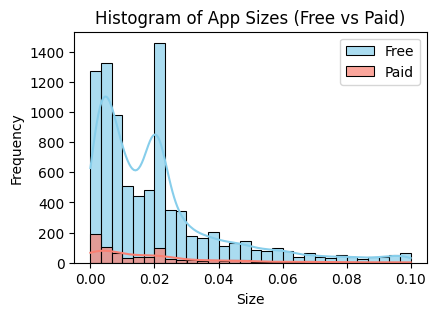

In [619]:
import matplotlib.pyplot as plt
import seaborn as sns

ree_apps = df[df['Price'] == 0]
paid_apps = df[df['Price'] > 0]

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 2)
sns.histplot(free_apps['Size'], label='Free', color='skyblue', kde=True, bins=30, alpha=0.7)
sns.histplot(paid_apps['Size'], label='Paid', color='salmon', kde=True, bins=30, alpha=0.7)
plt.title('Histogram of App Sizes (Free vs Paid)')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend()

plt.show()


### 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [620]:
correlation_matrix = df[['Rating', 'Reviews', 'Size', 'Price']].corr()
print(correlation_matrix)

           Rating   Reviews      Size     Price
Rating   1.000000  0.145637  0.044062 -0.018662
Reviews  0.145637  1.000000  0.261295 -0.040500
Size     0.044062  0.261295  1.000000 -0.022466
Price   -0.018662 -0.040500 -0.022466  1.000000


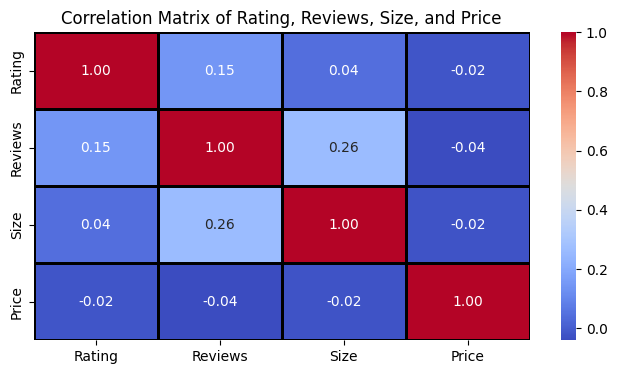

In [621]:
correlation_df = df[['Rating', 'Reviews', 'Size', 'Price']]
correlation_matrix = correlation_df.corr(method='pearson')

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Matrix of Rating, Reviews, Size, and Price')
plt.show()

### 11. How many apps exist for each type (free/paid) across different content ratings?

In [622]:
app_counts = df.groupby(['Content Rating', 'Type']).size().reset_index(name='Count')
print(app_counts)

    Content Rating  Type  Count
0  Adults only 18+  Free      3
1         Everyone  Free   7248
2         Everyone  Paid    655
3     Everyone 10+  Free    291
4     Everyone 10+  Paid     31
5       Mature 17+  Free    375
6       Mature 17+  Paid     18
7             Teen  Free    984
8             Teen  Paid     52
9          Unrated  Free      2


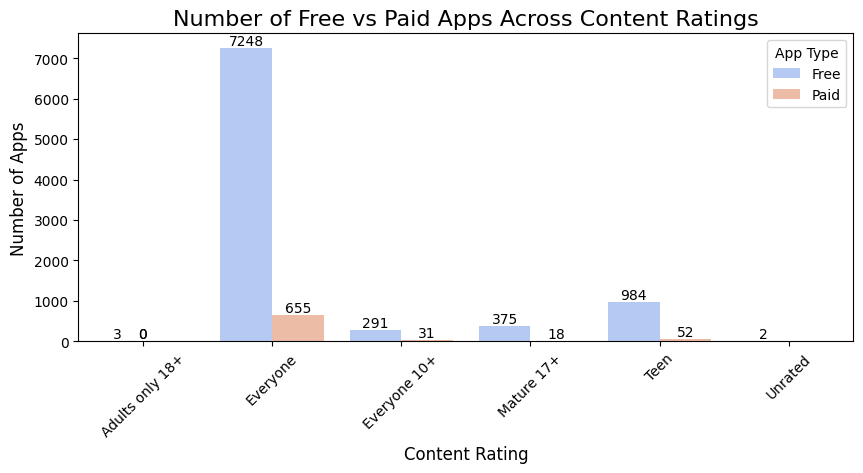

In [623]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=app_counts, x='Content Rating', y='Count', hue='Type', palette='coolwarm')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


plt.title('Number of Free vs Paid Apps Across Content Ratings', fontsize=16)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='App Type')

plt.show()


### 12. How many apps are compatible with Android version 4.x?

In [624]:
android_4x_apps = df[df['Android Ver'].astype(str).str.startswith('4.')]
num_android_4x_apps = android_4x_apps.shape[0]

print(f"Number of apps compatible with Android version 4.x: {num_android_4x_apps}")

Number of apps compatible with Android version 4.x: 6307
